# Multilayer Perceptron with Keras

This Notebook is a comprehensive guide to understanding and implementing a Multilayer Perceptron (MLP) using Keras, a high-level neural network API. We will explore different methods of defining a model in Keras, discuss activation and loss functions, and demonstrate how to compile, train, and evaluate our model


## Importing Necessary Libraries

Before we start, let's import all the necessary libraries for our deep learning project.

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras import Model


## Loading and Preparing the CIFAR-10 Dataset

The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes. We'll start by loading the dataset and preparing it for training.


In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode the labels
train_labels = utils.to_categorical(train_labels, 10)
test_labels = utils.to_categorical(test_labels, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 35s 0us/step


## Defining the Model

Keras offers multiple ways to build neural network models. Let's explore three different methods to define the same model architecture.


### Method 1: Using the Sequential API

The Sequential API is straightforward and useful for models with single inputs and outputs.


In [3]:
model_seq = Sequential([
  Flatten(input_shape=(32, 32, 3)),
  Dense(200, activation='relu'),
  Dense(150, activation='relu'),
  Dense(10, activation='softmax')
])

model_seq.summary()


c:\Users\AlxMa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 200)               │    614,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 150)               │     30,150 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 10)                │      1,510 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 646,260 (2.47 MB)

 Trainable params: 646,260 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

### Method 2: Using the Functional API

The Functional API provides more flexibility, allowing models with multiple inputs/outputs and shared layers.


In [4]:
inputs = Input(shape=(32, 32, 3))
x = Flatten()(inputs)
x = Dense(200, activation='relu')(x)
x = Dense(150, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

model_func = Model(inputs=inputs, outputs=outputs)

model_func.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten_1 (Flatten)             │ (None, 3072)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_3 (Dense)                 │ (None, 200)               │    614,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_4 (Dense)                 │ (None, 150)               │     30,150 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_5 (Dense)                 │ (None, 10)                │      1,510 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 646,260 (2.47 MB)

 Trainable params: 646,260 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

### Method 3: Sequential Model by Adding Layers

Alternatively, you can define a Sequential model by adding layers one by one.


In [5]:
model_seq_add = Sequential()
model_seq_add.add(Flatten(input_shape=(32, 32, 3)))
model_seq_add.add(Dense(200, activation='relu'))
model_seq_add.add(Dense(150, activation='relu'))
model_seq_add.add(Dense(10, activation='softmax'))

model_seq_add.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 3072)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_6 (Dense)                 │ (None, 200)               │    614,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_7 (Dense)                 │ (None, 150)               │     30,150 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_8 (Dense)                 │ (None, 10)                │      1,510 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 646,260 (2.47 MB)

 Trainable params: 646,260 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

## Compilation

Before training the model, we need to compile it. This step involves specifying the optimizer, loss function, and metrics.


In [6]:
model_seq.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


## Training the Model

Now, we're ready to train our model using the CIFAR-10 dataset.


In [7]:
history = model_seq.fit(train_images, train_labels, epochs=10, 
                        batch_size=32, validation_split=0.2, shuffle=True)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.2757 - loss: 2.0130 - val_accuracy: 0.3550 - val_loss: 1.7906
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.3799 - loss: 1.7255 - val_accuracy: 0.3681 - val_loss: 1.7610
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4125 - loss: 1.6401 - val_accuracy: 0.4154 - val_loss: 1.6351
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4333 - loss: 1.5846 - val_accuracy: 0.4106 - val_loss: 1.6640
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4472 - loss: 1.5384 - val_accuracy: 0.4242 - val_loss: 1.6215
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4576 - loss: 1.5176 - val_accuracy: 0.4401 - val_loss: 1.5680
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4650 - loss: 1.4866 - val_accuracy: 0.4456 - val_loss: 1.5663
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4736 - loss: 1.4696

## Evaluating the Model

After training, let's evaluate our model's performance on the test dataset.


In [8]:
test_loss, test_acc = model_seq.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')


313/313 - 1s - 2ms/step - accuracy: 0.4698 - loss: 1.5065

Test accuracy: 0.4697999954223633


Making Predictions
Finally, let's use our trained model to make predictions on new images.

In [11]:
predictions = model_seq.predict(test_images)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Visualizing Predictions
It's helpful to visualize the model's predictions to understand its performance better.

(10000, 10)
(10000,)


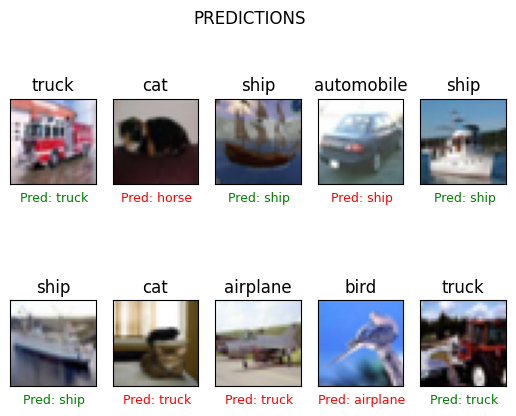

In [12]:
import matplotlib.pyplot as plt

CLASSES = np.array(['airplane','automobile','bird','cat','deer',
                    'dog','frog','horse','ship','truck'])

preds_single = CLASSES[np.argmax(predictions,axis=-1)]
actual_single = CLASSES[np.argmax(test_labels,axis=-1)]
# axis=-1 - Le dice a la función que colapse el arreglo sobre la última
# dimensión (la dimensión de clase) de tal forma que la forma es [10000,1]
print(predictions.shape)
print(preds_single.shape)


num = 10
# Serán seleccionados 10 índices de manera aleatoria de entre 10,000
indices = np.random.choice(range(len(test_images)),num)
fig,ax = plt.subplots(2,5)
fig.suptitle("PREDICTIONS")
# Enumerate da la clave para cada valor de indices

for row in range(2):
  for column in range(5):
    # Obtenemos índices dle 1 al 10
    idx = column+1+(row*5)
    # Imprimimos del 0 al 9
    img = test_images[indices[idx-1]]
    ax[row,column].imshow(img)
    #Mostramos el título
    ax[row,column].set_title(actual_single[indices[idx-1]])

    # Quitamos los ticks
    ax[row,column].set_xticks([])
    ax[row,column].set_yticks([])

    # Si es correcto, se imprime de color verde,
    # de lo contrario, se imprime de color roo
    if preds_single[indices[idx-1]] == actual_single[indices[idx-1]]:
      color = 'g'
    else:
      color = 'r'

    # x,y,texto,
    ax[row,column].text(16,38,"Pred: "+str(preds_single[indices[idx-1]]),
                        ha='center',fontsize=9,color=color)
plt.show()
